In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


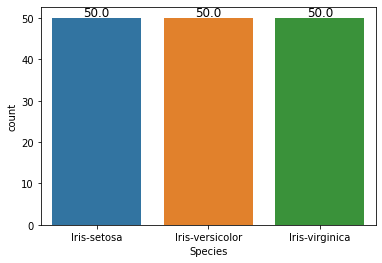

In [3]:
ax = sns.countplot(x='Species', data=iris_data)

# Calculate and add text labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

# Label Analysis
From this, we know the 3 species have data on them all equally split, 50 for each.


<AxesSubplot: >

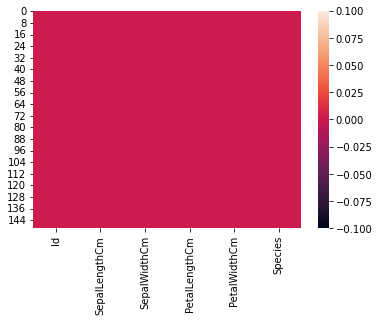

In [4]:
sns.heatmap(iris_data.isna())

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Heat Map Analysis
Based on heat map, there are no missing data in any of the columns. This means no need for imputatation.

<AxesSubplot: >

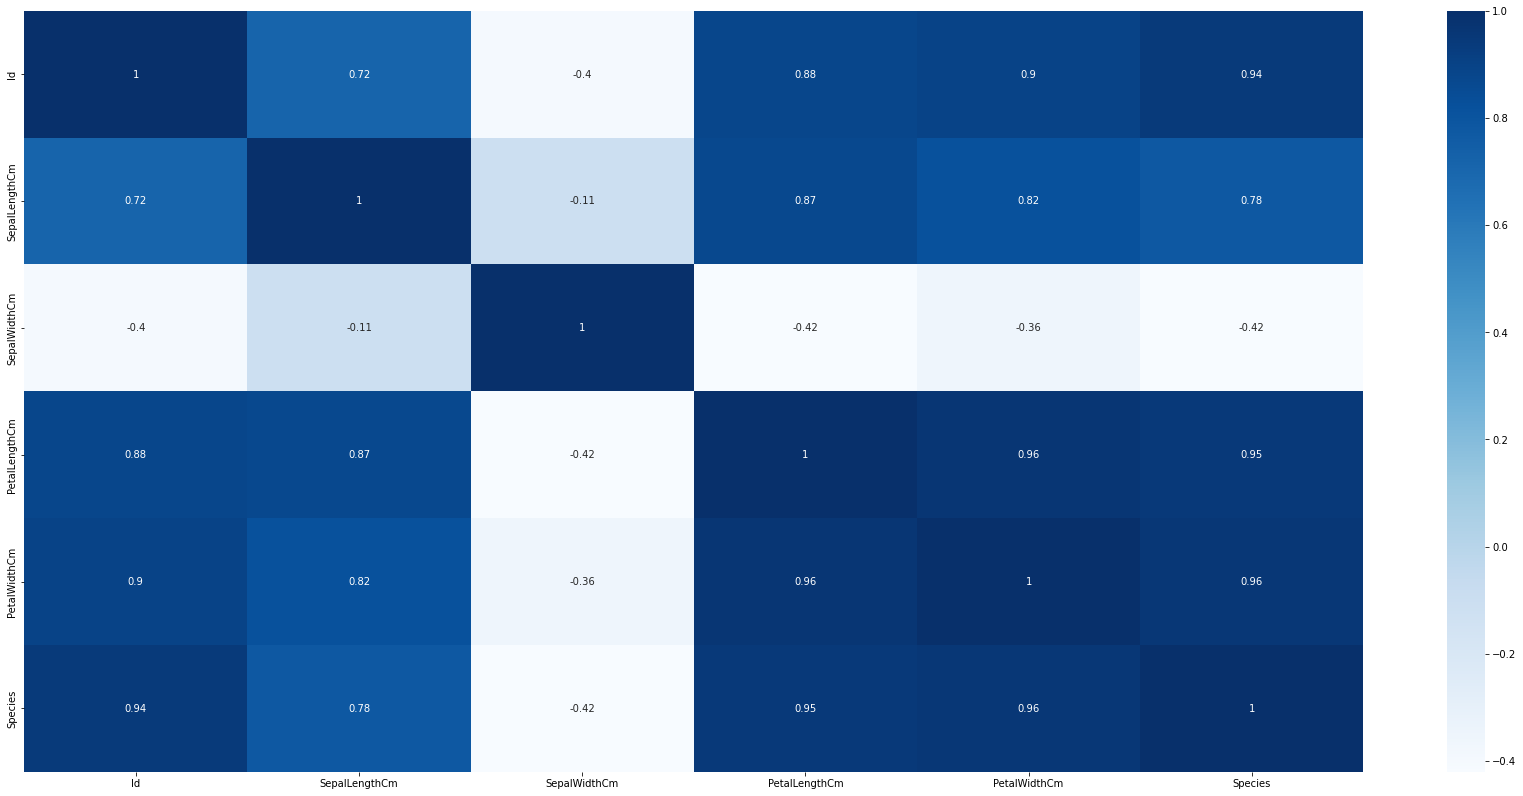

In [6]:
plt.figure(figsize=(30,14))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues')

# Correlation Analysis

It would seem that SepalWidthcm has the least correlation amongst the rest of the features. However, it is still high enough to implement it into the ML model. 

As for Id, at first glacne it seems to be correlated to the Species. However, upon closer inspection, that is only the case due to the ordering of the Species within the csv file. If it were randomize, it will surely not be correlated to Species anymore.

## Visualisation between each feature
It would seem that each feature is deeply correlated to one another. Let's plot them all against one another to better understand their relationship.

c:\Users\nicho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


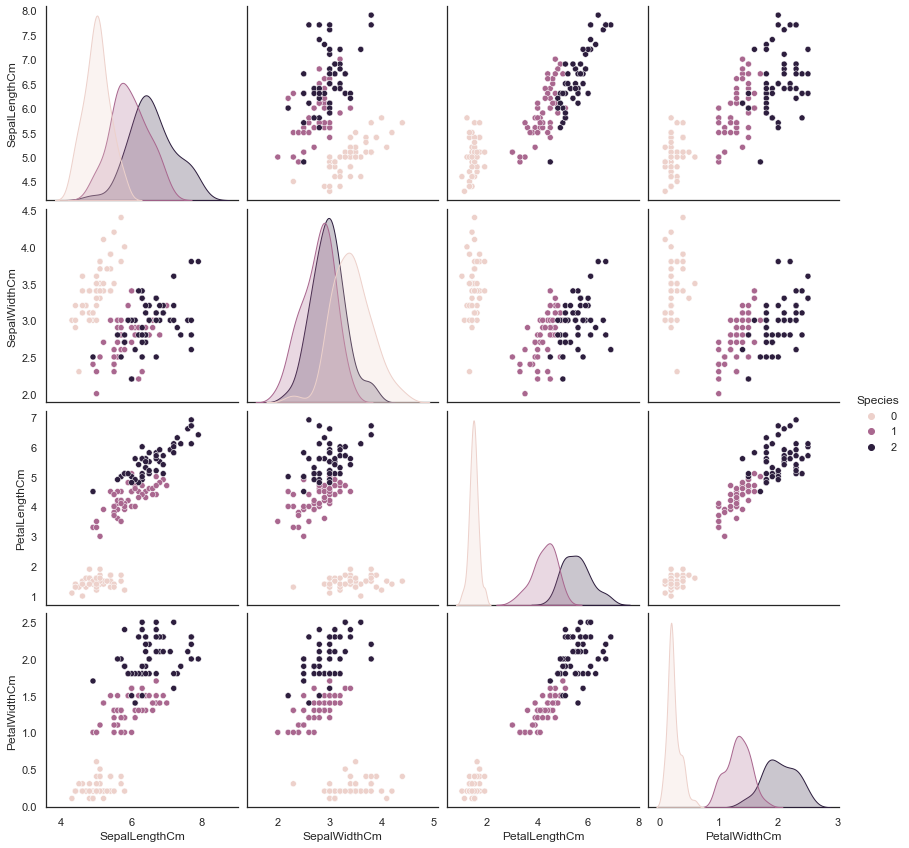

In [7]:


# Modify title appearance
sns.set(style="white")
sns.pairplot(iris_data.drop("Id", axis=1), hue="Species", size=3)


# Visual Analysis

It would seem that a clearly defined relationsihp can be observed amongst all of the plotted graphs, with the most cluttered one being SepalWidthCm. It will still be used as a feature for the ML model, but an alternative one will be used wihtoput it to compare the results later on.

In [8]:
from sklearn.model_selection import train_test_split

features = iris_data.drop(['Id','Species'],axis=1)
label = iris_data['Species']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)



# Modeling

I will use Logistic Regression to predict

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr = LogisticRegression()

lr.fit(x_train,y_train)
predict = lr.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [10]:
print(classification_report(y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50



## K-Nearest Neighbours

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(x_train,y_train)
predict=model.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,1,15


In [12]:
print(classification_report(y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.938     1.000     0.968        15
           2      1.000     0.938     0.968        16

    accuracy                          0.980        50
   macro avg      0.979     0.979     0.978        50
weighted avg      0.981     0.980     0.980        50



# Utilising only 1 type

It would appear that it is possible train a very accurate model with the given data. Let's see what happens when only 1 type is used.


In [13]:
Petal_Data=iris_data[['PetalLengthCm','PetalWidthCm','Species']]
Sepal_Data=iris_data[['SepalLengthCm','SepalWidthCm','Species']]

Petal_Data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [14]:
petal_x_train, petal_x_test, petal_y_train, petal_y_test = train_test_split(Petal_Data, label, test_size=0.33, random_state=42)
sepal_x_train, sepal_x_test, sepal_y_train, sepal_y_test = train_test_split(Sepal_Data, label, test_size=0.33, random_state=42)

petal_x_train

,PetalLengthCm,PetalWidthCm,Species
96,4.2,1.3,1
105,6.6,2.1,2
66,4.5,1.5,1
0,1.4,0.2,0
122,6.7,2.0,2
...,...,...,...
71,4.0,1.3,1
106,4.5,1.7,2
14,1.2,0.2,0
92,4.0,1.2,1


# Modeling the Petal and Sepal

# Logistic Regression

In [15]:
lr = LogisticRegression()

lr.fit(petal_x_train,petal_y_train)
predict = lr.predict(petal_x_test)
pd.DataFrame(confusion_matrix(petal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [16]:
print(classification_report(petal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50



In [17]:
lr = LogisticRegression()

lr.fit(sepal_x_train,sepal_y_train)
predict = lr.predict(sepal_x_test)
pd.DataFrame(confusion_matrix(sepal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

c:\Users\nicho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [18]:
print(classification_report(sepal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50



# K-Neighbours

In [19]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(petal_x_train,petal_y_train)
predict=model.predict(petal_x_test)
pd.DataFrame(confusion_matrix(petal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [20]:
print(classification_report(petal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50



In [21]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(sepal_x_train,sepal_y_train)
predict=model.predict(sepal_x_test)
pd.DataFrame(confusion_matrix(sepal_y_test, predict), columns = ['Class1', 'Class2', 'Class 3'], index = ['Class1', 'Class2', 'Class 3'])#print(classification_report(y_test, predict, digits = 3))

,Class1,Class2,Class 3
Class1,19,0,0
Class2,0,15,0
Class 3,0,0,16


In [22]:
print(classification_report(sepal_y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        15
           2      1.000     1.000     1.000        16

    accuracy                          1.000        50
   macro avg      1.000     1.000     1.000        50
weighted avg      1.000     1.000     1.000        50

